# Algorytm genetyczny

### Importowanie potrzebnych bibliotek

In [90]:
pip install pygad

In [91]:
pip install pyswarms

In [92]:
import numpy
import pygad
import time
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

### Tworzenie Nonogramu

In [93]:
kolumny = numpy.array([[7], [1], [1], [1], [7]])
wiersze = numpy.array([[1,1], [1,1], [1,1], [5], [1,1], [1,1], [1,1]])

table = numpy.array([[1,0,0,0,1],   # prawidłowy obraz
                    [1,0,0,0,1],
                    [1,0,0,0,1],
                    [1,1,1,1,1],
                    [1,0,0,0,1],
                    [1,0,0,0,1],
                    [1,0,0,0,1]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


### Tworzenie funkcji fitness

In [94]:
def fitness_func(solution, solution_idx):
    solution = numpy.reshape(solution, (7,5))
    fitness = -numpy.sum(numpy.abs(table - solution))
    return fitness

Powyższa funkcja fitness wylicza sumę błędnych przewidywań rozwiązania

### Parametry do algorytmu genetycznego

In [95]:
fitness_function = fitness_func

gene_space = [0,1]
sol_per_pop = 8
num_genes = len(kolumny)*len(wiersze)

num_parents_mating = 5
num_generations = 200
keep_parents = 2

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 6

### Algorytm genetyczny

In [96]:
ga_instance = pygad.GA(gene_space=gene_space,
                       gene_type=int,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

### Wynik

Parameters of the best solution : 
 [[1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 1 0 1]
 [1 0 0 0 1]]
Fitness value of the best solution = -1
The length of the algorithm 0.2361137866973877


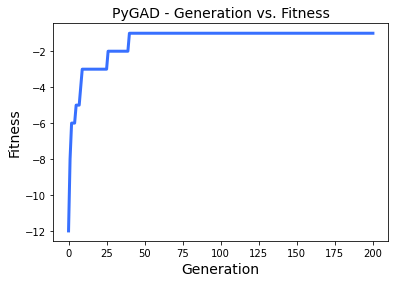

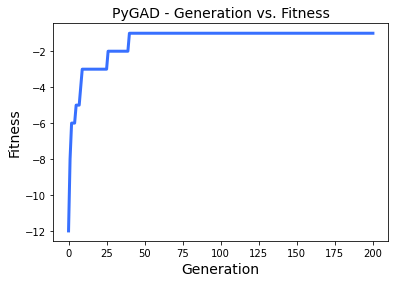

In [97]:
start = time.time()

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution = numpy.reshape(solution, (7,5))

print("Parameters of the best solution : \n {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

end = time.time()

print("The length of the algorithm", end - start)

ga_instance.plot_fitness()

In [98]:
t = []
sol = []
for i in range(10):
  start = time.time()

  ga_instance.run()

  solution, solution_fitness, solution_idx = ga_instance.best_solution()
  solution = numpy.reshape(solution, (7,5))

  end = time.time()
  t.append(end-start)
  sol.append(solution_fitness)

print("Średni czas wykonywania algorytmu: ", numpy.mean(t))
print("Średni bład algorytmu: ", numpy.mean(sol))

Średni czas wykonywania algorytmu:  0.13919692039489745
Średni bład algorytmu:  -0.1


### Wnioski

Nasz algorytm prawidłowo przewiduje 34 na 35 pól Nonogramu, co jest wynikiem całkiem dobrym.
Algorytm genetyczny szybko rozwiązuje Nonogram. Zajmuję mu to ok. 0.2 sekundy.

# Algorytm PSO

### Funkcja fitness

In [99]:
def fitness_func2(solution):
    solution = numpy.reshape(solution, (7,5))
    fitness = numpy.sum(numpy.abs(table - solution))
    return fitness

### Parametry PSO

In [100]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k':4, 'p':1}

### Wynik

2022-04-29 19:14:52,569 - pyswarms.discrete.binary - INFO - Optimize for 60 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 4, 'p': 1}
pyswarms.discrete.binary: 100%|██████████|60/60, best_cost=3
2022-04-29 19:14:52,742 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 3.0, best pos: [1 0 0 0 1]


The length of the algorithm 0.17413806915283203


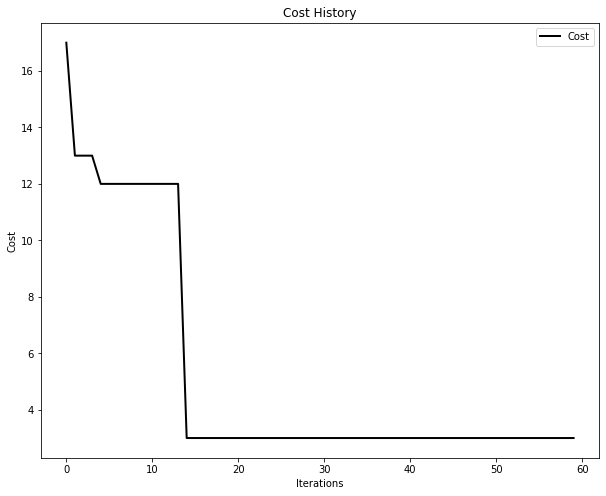

In [101]:
optimizer = ps.discrete.BinaryPSO(n_particles=7, dimensions=5, options=options)
start2 = time.time()
optimizer.optimize(fitness_func2, iters=60, verbose=True)
end2 = time.time()
print("The length of the algorithm", end2 - start2)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()

### Wnioski

Niestety nie udało się znaleźć tablicy rozwiązań za pomocą algorytmu PSO. Za to poprawnie rozwiązuje i wyświetla pierwszy wiersz Nonogramu.

### Przykład zastosowania algorytmu genetycznego na większym obrazku

In [102]:
table = numpy.array([[1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0],
                      [1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1],
                      [1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1],
                      [1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1],
                      [1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0]])

kolumny = [[5],[1],[1],[5],[0],[5],[1,1,1],[1,1,1],
           [1,1,1],[0],[5],[1],[1],[1],[0],[5],
           [1],[1],[1],[0],[3],[1,1],[1,1],[1,1],[3]]

wiersze = [[1,1,4,1,1,3],[1,1,1,1,1,1,1],[4,4,1,1,1,1],
           [1,1,1,1,1,1,1,],[1,1,4,4,4,3]]

In [103]:
def fitness_func(solution, solution_idx):
    solution = numpy.reshape(solution, (5,25))
    fitness = -numpy.sum(numpy.abs(table - solution))
    return fitness

fitness_function = fitness_func

gene_space = [0,1]
sol_per_pop = 8
num_genes = len(kolumny)*len(wiersze)

num_parents_mating = 5
num_generations = 200
keep_parents = 2

parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 6

ga_instance = pygad.GA(gene_space=gene_space,
                       gene_type=int,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

Parameters of the best solution : 
 [[1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0]
 [0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1]
 [0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1]
 [1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0]]
Fitness value of the best solution = -15
The length of the algorithm 0.31981515884399414


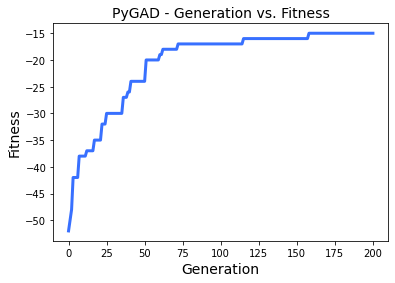

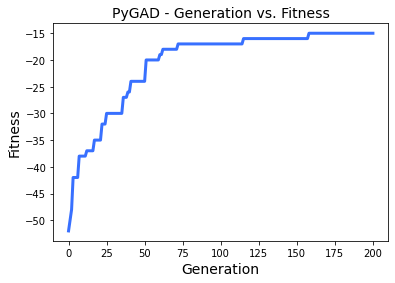

In [104]:
start = time.time()

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution = numpy.reshape(solution, (5,25))
print("Parameters of the best solution : \n {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
end = time.time()
print("The length of the algorithm", end - start)
ga_instance.plot_fitness()

In [105]:
t = []
sol = []
for i in range(10):
  start = time.time()

  ga_instance.run()

  solution, solution_fitness, solution_idx = ga_instance.best_solution()
  solution = numpy.reshape(solution, (5,25))

  end = time.time()
  t.append(end-start)
  sol.append(solution_fitness)

print("Średni czas wykonywania algorytmu: ", numpy.mean(t))
print("Średni bład algorytmu: ", numpy.mean(sol))

Średni czas wykonywania algorytmu:  0.2063953161239624
Średni bład algorytmu:  -9.8


### Wnioski

Jak widać jest to szybka metoda na rozwiązywanie Nonogramów, jednak nie najlepsza ponieważ robi dosyć duże błędy i im większy Nonogram tym tych błędów jest więcej.